<a href="https://colab.research.google.com/github/Usharani2051/Elevate_Labs_Task7/blob/main/Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3

# Create database in current session
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_data = [
    ("Laptop", 3, 800),
    ("Laptop", 2, 820),
    ("Phone", 5, 500),
    ("Phone", 4, 520),
    ("Headphones", 10, 50),
    ("Headphones", 7, 55),
    ("Monitor", 4, 200),
    ("Monitor", 3, 210)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Commit & close
conn.commit()
conn.close()

print("Database created and sample data inserted!")


Database created and sample data inserted!


      product  total_qty  revenue
0  Headphones         17    885.0
1      Laptop          5   4040.0
2     Monitor          7   1430.0
3       Phone          9   4580.0


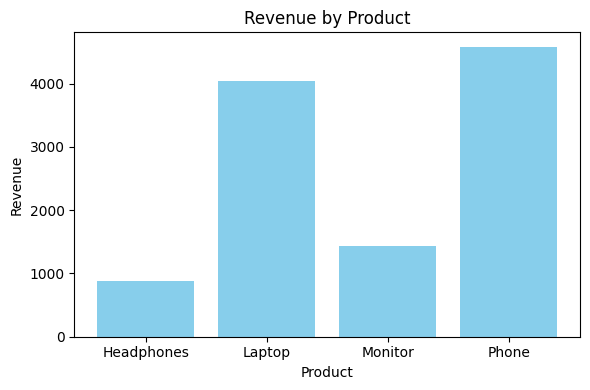

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to DB
conn = sqlite3.connect("sales_data.db")

# Run SQL query
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Print results
print(df)

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(df['product'], df['revenue'], color='skyblue')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.tight_layout()
plt.show()


In [6]:
plt.savefig("sales_data_chart.png")

<Figure size 640x480 with 0 Axes>